## **[Perceptron](https://m.blog.naver.com/PostView.naver?blogId=samsjang&logNo=220955881668&categoryNo=87&proxyReferer=)**

## **1. 퍼셉트론(Perceptron)**

### **2. 단층 퍼셉트론(Single-Layer Perceptron)**
- **OR, AND with [Sign Function](https://en.wikipedia.org/wiki/Sign_function)**

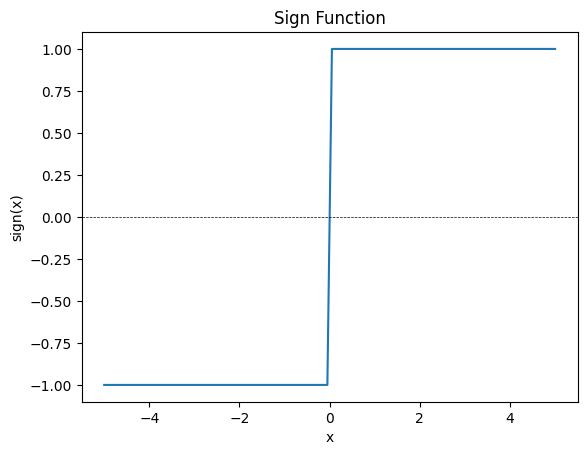

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Divide the x-axis into 100 values up to [-5, 5].
x = np.linspace(-5, 5, 100)

# Calculate the sign of each element in the array.
y = np.sign(x)

# Plot the sign function.
plt.plot(x, y)
plt.title('Sign Function')
plt.xlabel('x'); plt.ylabel('sign(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.show()

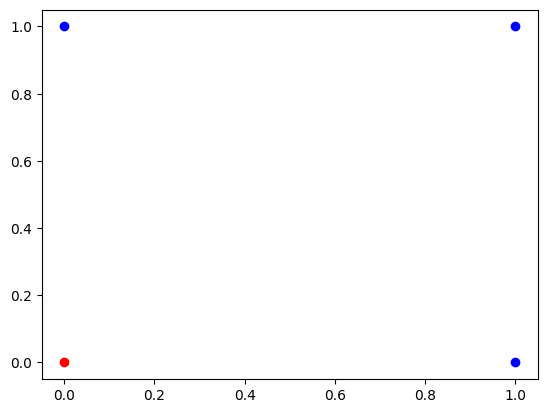

In [ ]:
import numpy as np

X = np.array([[0,0], [1,0], [0,1], [1,1]])
Y = np.array([-1,1,1,1])   # OR
#Y = np.array([-1,-1,-1,1])   # AND

import matplotlib.pyplot as plt

plt.scatter(X[0][0], X[0][1], c='red')
plt.scatter(X[1][0], X[1][1], c='blue')
plt.scatter(X[2][0], X[2][1], c='blue')
plt.scatter(X[3][0], X[3][1], c='blue')
plt.show()

In [ ]:
w= np.array([1. , 1. , 1.])  # [bias, w1, w2]
w

array([1., 1., 1.])

In [ ]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [ ]:
w[1:]

array([1., 1.])

In [ ]:
w[0]

1.0

In [ ]:
np.dot(X, w[1:])

array([0., 1., 1., 2.])

In [ ]:
# 단층 퍼셉트론(Single-Layer Perceptron)
f = np.dot(X, w[1:]) + w[0]
f

array([1., 2., 2., 3.])

In [ ]:
np.where(f > 0, 1, -1)

array([1, 1, 1, 1])

In [ ]:
print("predict (before traning)", w)

predict (before traning) [1. 1. 1.]


In [ ]:
def forward(x):
  return np.dot(x, w[1:]) + w[0]

def predict(X):
  return np.where(forward(X) > 0, 1, -1)

In [ ]:
predict(X)

array([1, 1, 1, 1])

In [ ]:
Y - predict(X)

array([-2,  0,  0,  0])

In [ ]:
print("predict (before traning)", w)

for epoch in range(50):
  for x_val, y_val in zip(X, Y):
    update = 0.01 * (y_val - predict(x_val))
    w[1:] += update * x_val
    w[0] += update

print("predict (after traning)", w)

predict (before traning) [1. 1. 1.]
predict (after traning) [-6.17561557e-16  1.00000000e+00  1.00000000e+00]


In [ ]:
np.dot(X, w[1:])

array([0., 1., 1., 2.])

In [ ]:
np.dot(X, w[1:]) + w[0]

array([-6.17561557e-16,  1.00000000e+00,  1.00000000e+00,  2.00000000e+00])

In [ ]:
np.where(np.dot(X, w[1:]) + w[0] > 0, 1, -1)

array([-1,  1,  1,  1])

### **2. 다층 퍼셉트론(Multi-Layer Perceptron)**
- **XOR**

In [ ]:
X = np.array([[0,0], [1,0], [0,1], [1,1]])
Y = np.array([-1,1,1,-1])   # OR

In [ ]:
def forward(x):
  return np.dot(x, w[1:]) + w[0]

def predict(X):
  return np.where(forward(X) > 0, 1, -1)

print("predict (before traning)", w)

for epoch in range(50):
  for x_val, y_val in zip(X, Y):
    update = 0.01 * (y_val - predict(x_val))
    w[1:] += update * x_val
    w[0] += update

print("predict (after traning)", w)
np.where(np.dot(X, w[1:]) + w[0] > 0, 1, -1)

predict (before traning) [-6.17561557e-16  1.00000000e+00  1.00000000e+00]
predict (after traning) [-6.17561557e-16  1.00000000e+00  1.00000000e+00]


array([-1,  1,  1,  1])

In [ ]:
import numpy as np

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, 1, 1, -1])  # XOR

w = np.zeros(3)  # Add one more weight for the bias

def forward(x):
    return np.dot(x, w[1:]) + w[0]

def predict(X):
    return np.where(forward(X) > 0, 1, -1)

print("predict (before training)", predict(X))

for epoch in range(50):
    for x_val, y_val in zip(X, Y):
        update = 0.01 * (y_val - predict(x_val))
        w[1:] += update * x_val
        w[0] += update

print("predict (after training)", predict(X))

predict (before training) [-1 -1 -1 -1]
predict (after training) [ 1  1 -1 -1]


In [ ]:
np.where(np.dot(X, w[1:]) + w[0] > 0, 1, -1)

array([ 1,  1, -1, -1])

In [ ]:
import numpy as np

class Perceptron():
    def __init__(self, threshold=0.0, eta=0.01, n_iter=100):
        self.threshold = threshold
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print(self.w_)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) > self.threshold, 1, -1)

if __name__ == '__main__':
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([1, -1, -1, 1])  # Updated the target values for the XOR logic


    ppn = Perceptron()
    ppn.fit(X, y)
    print(ppn.errors_)

[3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [ ]:
ppn.predict(X)

array([-1, -1,  1,  1])

In [ ]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Define the XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# The corresponding XOR outputs
y = np.array([[0],[1], [1], [0]]) #y = np.array([0, 1, 1, 0])

# Set the random seed for reproducibility
np.random.seed(42)

# Initialize weights and biases with random values
input_size = 2
hidden_size = 2
output_size = 1

weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
bias_hidden = np.zeros((1, hidden_size))

weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
bias_output = np.zeros((1, output_size))

# Set hyperparameters
learning_rate = 0.1
epochs = 10000

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - predicted_output

    # Backpropagation
    output_error = error * sigmoid_derivative(predicted_output)
    hidden_layer_error = output_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(output_error) * learning_rate
    bias_output += np.sum(output_error, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(hidden_layer_error) * learning_rate
    bias_hidden += np.sum(hidden_layer_error, axis=0, keepdims=True) * learning_rate

# Testing the neural network
test_input = np.array([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

hidden_layer_input_test = np.dot(test_input, weights_input_hidden) + bias_hidden
hidden_layer_output_test = sigmoid(hidden_layer_input_test)

output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
predicted_output_test = sigmoid(output_layer_input_test)

# Display the predicted output
print("Predicted XOR output:")
print(predicted_output_test)

ValueError: ignored

- Dense: This represents a fully connected layer, where each neuron in the layer is connected to every neuron in the previous layer.

- 8: This specifies the number of neurons (units) in the layer. In this case, there are 8 neurons in the first hidden layer.

- input_dim=2: This is the number of input features. In this example, you have 2 input features (X has shape (4, 2)), so the input_dim is set to 2.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Define the model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=1000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, Y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(X)
rounded_predictions = np.round(predictions)
print("Predictions:")
print(rounded_predictions.flatten())

1/1 [==============================] - 0s 130ms/step - loss: 0.2101 - accuracy: 1.0000
Loss: 0.21014553308486938, Accuracy: 1.0
1/1 [==============================] - 0s 52ms/step
Predictions:
[0. 1. 1. 0.]


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X, Y, epochs=1000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, Y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(X)
rounded_predictions = np.round(predictions)
print("Predictions:", rounded_predictions)

1/1 [==============================] - 0s 143ms/step - loss: 0.0167 - accuracy: 1.0000


Loss: 0.016748003661632538, Accuracy: 1.0
1/1 [==============================] - 0s 53ms/step
Predictions: [[0.]
 [1.]
 [1.]
 [0.]]


Predictions : [0. 1. 1. 0.]


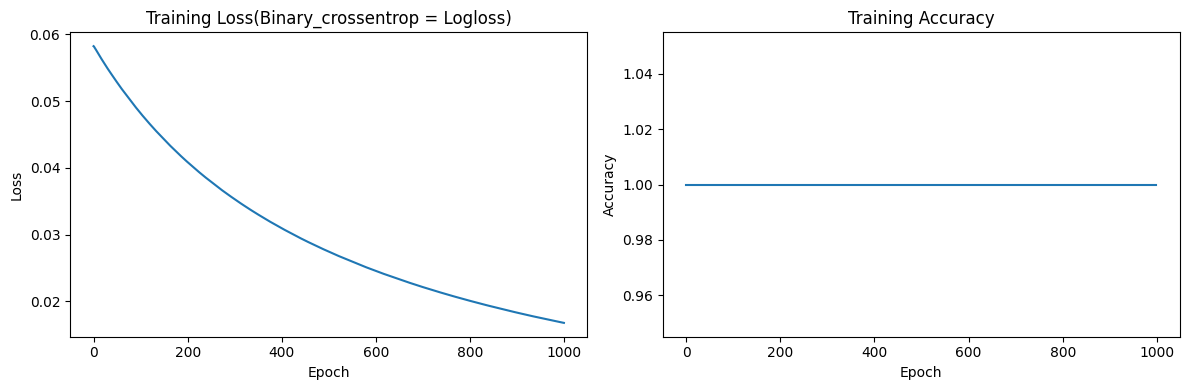

In [ ]:
print(f'Predictions : {rounded_predictions.flatten()}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss(Binary_crossentrop = Logloss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()